In [2]:
# Importing necessary libraries for this project
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Layer, Input
from keras.layers import Conv1D, MaxPooling1D, LSTM, Bidirectional
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
# Importing the necessary library to mount Google Drive to the '/content/drive' directory in Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the training data from a .npy file (X_train.npy) stored in Google Drive
xtrain = np.load('/content/drive/MyDrive/Projects/X_train.npy')

# Displaying the loaded training data
xtrain

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0]],

       [[0, 0, 0, 1],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        ...,
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0]],

       ...,

       [[0, 0, 1, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        ...,
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]],

       [[0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        ...,
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0]],

       [[0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0]]], dtype=uint8)

In [5]:
# Loading the training labels from a .npy file (y_train.npy) stored in Google Drive
ytrain = np.load('/content/drive/MyDrive/Projects/y_train.npy')

# Loading the training labels
ytrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [6]:
# Loading the testing data from a .npy file (X_test.npy) stored in Google Drive
xtest = np.load('/content/drive/MyDrive/Projects/X_test.npy')

# Displaying the loaded testing data
xtest

array([[[1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        ...,
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0]],

       [[0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 1, 0, 0]],

       [[0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0]],

       ...,

       [[1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0]],

       [[0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        ...,
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]],

       [[1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        ...,
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]]], dtype=uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
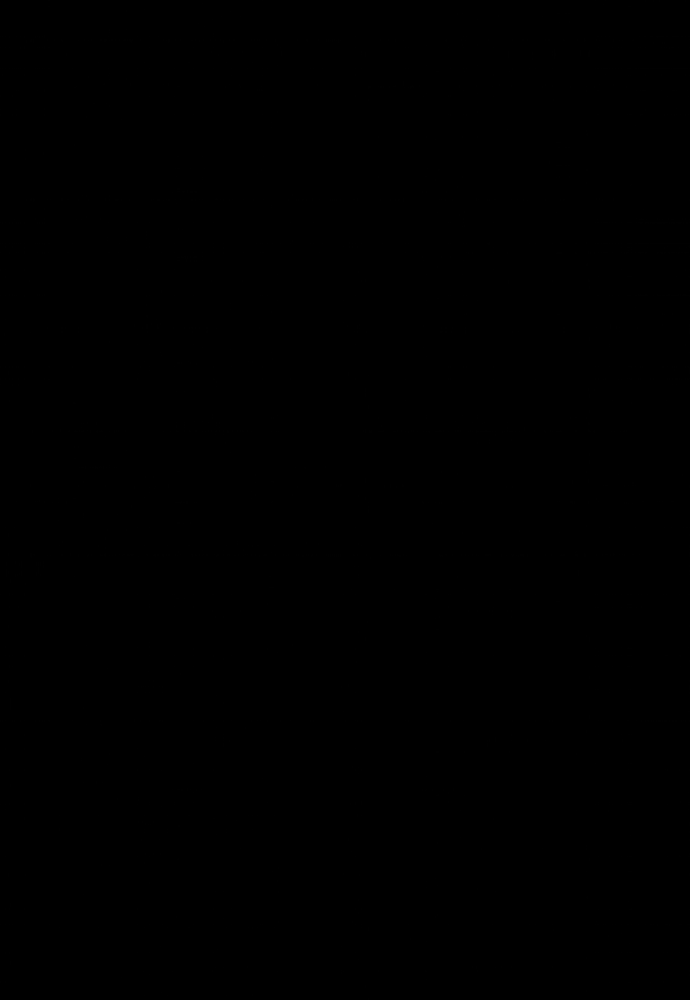

In [7]:
# Loading the testing labels from a .npy file (y_test.npy) stored in Google Drive
ytest = np.load('/content/drive/MyDrive/Projects/y_test.npy')

# Displaying the loaded testing labels
ytest

In [8]:
# Displaying the shapes of the training and testing datasets and labels
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((10000, 1000, 4), (1000, 1000, 4), (10000, 690), (1000, 690))

In [9]:
# Input layer defined with shape (1000, 4) as per the one-hot encoded matrix of the DNA Sequences
input_data = Input(shape = (1000, 4))

# Convolutional layer with 320 filters, kernel size 26 and Rectified Linear Unit (ReLU) activation
output = Conv1D(filters = 320, kernel_size = 26, activation = 'relu')(input_data)

# Max pooling layer
output = MaxPooling1D()(output)

# Dropout layer with dropout rate of 10%. Helps reduce overfitting
output = Dropout(0.1)(output)

# Bidirectional LSTM layer with 320 units, return_sequences parameter is True
output = Bidirectional(LSTM(units = 320, return_sequences = True))(output)

# Dropout layer with dropout rate of 50%. Helps reduce overfitting
output = Dropout(0.5)(output)

# Flatten layer
flatten = Flatten()(output)

# Fully connected dense layer with 695 unit and ReLU activation
fully_connected = Dense(695)(flatten)
fully_connected = Activation('relu')(fully_connected)

# Output dense layer with 690 units and sigmoid activation as labels are either 1 or 0
output = Dense(690)(fully_connected)
output = Activation('sigmoid')(output)

In [10]:
# Defining the CNN-BiLSTM model with input and output layers
model = Model(inputs = input_data, outputs = output)

In [11]:
# Compiling the model with Adam optimizer and Binary Crossentropy as the loss function
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.BinaryCrossentropy())

In [12]:
# Summary of Model Architecture
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000, 4)]         0         
                                                                 
 conv1d (Conv1D)             (None, 975, 320)          33600     
                                                                 
 max_pooling1d (MaxPooling1  (None, 487, 320)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 487, 320)          0         
                                                                 
 bidirectional (Bidirection  (None, 487, 640)          1640960   
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 487, 640)          0     

In [13]:
# Training the Model on training data
# xtrain, ytrain: input training data and target training labels respectively
# batch_size: 100 samples per gradient update
# epochs: trains the model for 5 epochs
# verbose: progress bar
# validation_split: portion of the training data used as validation data is 20%
history = model.fit(xtrain, ytrain, batch_size = 100, epochs = 5, verbose = 1, validation_split = 0.2)

Epoch 1/5
80/80 [==============================] - 34s 312ms/step - loss: 0.0881 - val_loss: 0.0607
Epoch 2/5
80/80 [==============================] - 25s 318ms/step - loss: 0.0611 - val_loss: 0.0576
Epoch 3/5
80/80 [==============================] - 25s 318ms/step - loss: 0.0592 - val_loss: 0.0590
Epoch 4/5
80/80 [==============================] - 26s 329ms/step - loss: 0.0584 - val_loss: 0.0622
Epoch 5/5
80/80 [==============================] - 26s 328ms/step - loss: 0.0566 - val_loss: 0.0622


In [14]:
# Calculating the average training loss from training history
np.mean(history.history['loss'])

0.0646833635866642

In [15]:
# Calculating the average validation loss from training history
np.mean(history.history['val_loss'])

0.06034699231386185

In [16]:
# Evaluating Model's loss on testing data and labels
loss = model.evaluate(xtest, ytest)

32/32 [==============================] - 2s 42ms/step - loss: 0.0343
